Question 24
---

In [2]:
import os
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms.matrix_factorization import SVD

In [3]:
file_path = os.path.expanduser('C:/Users/Jinxi/Desktop/EE219/Project_3/ml-latest-small/ml-latest-small/ratings.csv')
# reader = Reader(line_format = 'userId movieId rating timestamp', sep = '\t', skip_lines = 1)
reader = Reader(line_format = 'user item rating timestamp', sep = ',', skip_lines = 1)
data = Dataset.load_from_file(file_path, reader = reader)

x = range(2, 51, 2)
avg_rmse = [0] * len(x)
avg_mae = [0] * len(x)
for k in x:
    algo = SVD(k)
    a = cross_validate(algo, data, measures = ['RMSE', 'MAE'], cv = 10)
    test_rmse = a['test_rmse']
    test_mae = a['test_mae']
    avg_rmse[int(k/2 -1)] = sum(test_rmse) / len(test_rmse)
    avg_mae[int(k/2 -1)] = sum(test_mae) / len(test_mae)
    print (int(k/2 -1))
    print (avg_rmse[int(k/2 -1)])
    print (avg_mae[int(k/2 -1)])

0
0.887833198607
0.684016668484
1
0.887123604643
0.683711457558
2
0.887203812454
0.683203626905
3
0.887282286473
0.682815680894
4
0.887782198525
0.683459459268
5
0.887199513262
0.682554260874
6
0.887712991629
0.683542151939
7
0.887275550412
0.682998150468
8
0.887273043863
0.682827668974
9
0.887601448041
0.682922911116
10
0.888039742696
0.68374563946
11
0.888303764803
0.684017649611
12
0.888266694733
0.683373508049
13
0.88759911415
0.68315377265
14
0.888532251381
0.683949287676
15
0.888228943608
0.683886314299
16
0.888780772128
0.684430263421
17
0.888356050142
0.682986066444
18
0.888501140045
0.683378802653
19
0.889248851616
0.684415624754
20
0.88881185193
0.68356729261
21
0.888686718497
0.683584824303
22
0.888794938953
0.683716155493
23
0.889538308259
0.684256770053
24
0.889163871026
0.684142721232


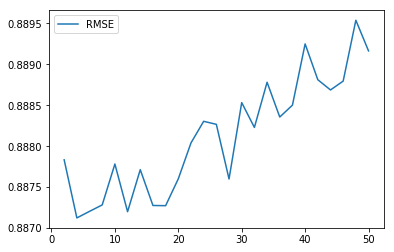

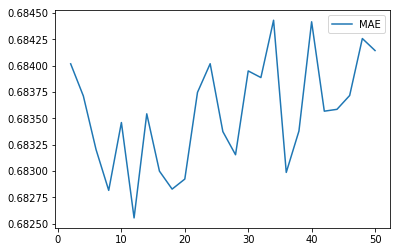

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(x, avg_rmse, label='RMSE')
#plt.plot(x, avg_mae, label='MAE')
plt.legend()
plt.show()

#plt.plot(x, avg_rmse, label='RMSE')
plt.plot(x, avg_mae, label='MAE')
plt.legend()
plt.show()

Question 25
---


Question 26
---

RMSE: 0.8971
RMSE: 0.8833
RMSE: 0.8805
RMSE: 0.8756
RMSE: 0.8888
RMSE: 0.8805
RMSE: 0.8864
RMSE: 0.8928
RMSE: 0.8850
RMSE: 0.9056
RMSE: 0.8963
RMSE: 0.8736
RMSE: 0.8824
RMSE: 0.8939
RMSE: 0.8865
RMSE: 0.8887
RMSE: 0.8857
RMSE: 0.8866
RMSE: 0.8961
RMSE: 0.8883
RMSE: 0.8867
RMSE: 0.8891
RMSE: 0.8833
RMSE: 0.8761
RMSE: 0.8890
RMSE: 0.8882
RMSE: 0.8885
RMSE: 0.8762
RMSE: 0.8922
RMSE: 0.9065
RMSE: 0.8710
RMSE: 0.8814
RMSE: 0.8988
RMSE: 0.8897
RMSE: 0.8920
RMSE: 0.8899
RMSE: 0.8818
RMSE: 0.8992
RMSE: 0.8946
RMSE: 0.8792
RMSE: 0.9008
RMSE: 0.8865
RMSE: 0.8807
RMSE: 0.8850
RMSE: 0.8884
RMSE: 0.8682
RMSE: 0.8870
RMSE: 0.8827
RMSE: 0.8930
RMSE: 0.9019
RMSE: 0.8805
RMSE: 0.9003
RMSE: 0.8886
RMSE: 0.8797
RMSE: 0.8850
RMSE: 0.8898
RMSE: 0.8845
RMSE: 0.8824
RMSE: 0.8954
RMSE: 0.8945
RMSE: 0.8914
RMSE: 0.8917
RMSE: 0.8907
RMSE: 0.8837
RMSE: 0.8944
RMSE: 0.8790
RMSE: 0.8730
RMSE: 0.8828
RMSE: 0.8919
RMSE: 0.8969
RMSE: 0.8844
RMSE: 0.8821
RMSE: 0.8880
RMSE: 0.8876
RMSE: 0.8782
RMSE: 0.8876
RMSE: 0.8875

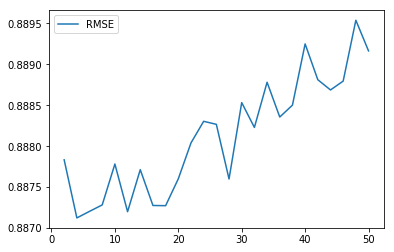

In [5]:
def trim(test_data, trim_condition = lambda x: x <= 2):
    movie_map = {}
    for i in test_data:
        movie = i[1]
        movie_map[movie] = 1 if(movie not in movie_map) else movie_map[movie] + 1
    for movie in movie_map:
        if trim_condition(movie_map[movie]):
            test_data = filter(lambda x: x[1] != movie, test_data)
    return test_data

from surprise.model_selection import KFold
from surprise import accuracy
import matplotlib.pyplot as plt
import numpy as np

x = range(2, 51, 2)

# the trim function is used to process the testset
# by default the trim function don't do anything
def knn_filter_trim(trim = lambda x : x):
    n_splits = 10
    kf = KFold(n_splits = n_splits)
    rmse_list = []
    for k in x:
        rmse = 0
        algo = SVD(k)
        for trainset, testset in kf.split(data):
            algo.fit(trainset)
            testset = trim(testset)
            prediction = algo.test(testset)
            rmse += accuracy.rmse(prediction)
        rmse_list.append(rmse / n_splits)
    return rmse_list

def plot_rmse(rmse_list):
    
    plt.plot(x, avg_rmse, label='RMSE')
    plt.legend()
    plt.show()
    
def trim_popular(test_data):
    return trim(test_data)
    
rmse_list_popular = knn_filter_trim(trim_popular)
plot_rmse(rmse_list_popular)

Question 27
---

RMSE: 0.8769
RMSE: 0.8951
RMSE: 0.8776
RMSE: 0.9001
RMSE: 0.8971
RMSE: 0.8829
RMSE: 0.8910
RMSE: 0.8869
RMSE: 0.8823
RMSE: 0.8818
RMSE: 0.8741
RMSE: 0.8886
RMSE: 0.8943
RMSE: 0.8813
RMSE: 0.8936
RMSE: 0.8962
RMSE: 0.8770
RMSE: 0.8981
RMSE: 0.8936
RMSE: 0.8804
RMSE: 0.8878
RMSE: 0.8983
RMSE: 0.9083
RMSE: 0.8858
RMSE: 0.8751
RMSE: 0.8759
RMSE: 0.8786
RMSE: 0.8901
RMSE: 0.8898
RMSE: 0.8900
RMSE: 0.8849
RMSE: 0.8801
RMSE: 0.8888
RMSE: 0.8857
RMSE: 0.8927
RMSE: 0.8946
RMSE: 0.8728
RMSE: 0.8876
RMSE: 0.8855
RMSE: 0.8969
RMSE: 0.8956
RMSE: 0.8886
RMSE: 0.8836
RMSE: 0.8880
RMSE: 0.8923
RMSE: 0.8907
RMSE: 0.8786
RMSE: 0.8805
RMSE: 0.8914
RMSE: 0.8844
RMSE: 0.8944
RMSE: 0.9014
RMSE: 0.8804
RMSE: 0.8847
RMSE: 0.8853
RMSE: 0.8790
RMSE: 0.8855
RMSE: 0.8920
RMSE: 0.8908
RMSE: 0.8785
RMSE: 0.8968
RMSE: 0.8802
RMSE: 0.9039
RMSE: 0.8853
RMSE: 0.8804
RMSE: 0.8862
RMSE: 0.8835
RMSE: 0.8892
RMSE: 0.8933
RMSE: 0.8812
RMSE: 0.8898
RMSE: 0.8878
RMSE: 0.8828
RMSE: 0.8945
RMSE: 0.8840
RMSE: 0.8830
RMSE: 0.8903

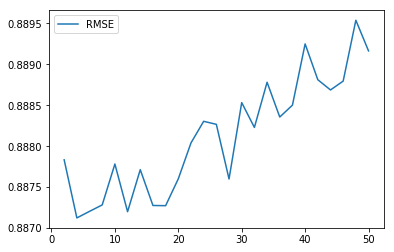

In [6]:
def trim_unpopular(test_data):
    return trim(test_data,trim_condition = lambda x: x > 2)
    
rmse_list_unpopular = knn_filter_trim(trim_unpopular)
plot_rmse(rmse_list_unpopular)

Question 28
---

RMSE: 0.8915
RMSE: 0.8946
RMSE: 0.8908
RMSE: 0.8854
RMSE: 0.8643
RMSE: 0.8880
RMSE: 0.8950
RMSE: 0.8891
RMSE: 0.8929
RMSE: 0.8821
RMSE: 0.8975
RMSE: 0.8818
RMSE: 0.8839
RMSE: 0.8864
RMSE: 0.8956
RMSE: 0.8953
RMSE: 0.8783
RMSE: 0.8789
RMSE: 0.8800
RMSE: 0.8995
RMSE: 0.8755
RMSE: 0.8794
RMSE: 0.8723
RMSE: 0.8808
RMSE: 0.8845
RMSE: 0.8925
RMSE: 0.9017
RMSE: 0.9118
RMSE: 0.8943
RMSE: 0.8822
RMSE: 0.8891
RMSE: 0.8825
RMSE: 0.8851
RMSE: 0.8995
RMSE: 0.8834
RMSE: 0.8802
RMSE: 0.8904
RMSE: 0.8910
RMSE: 0.8858
RMSE: 0.8845
RMSE: 0.8860
RMSE: 0.8896
RMSE: 0.8957
RMSE: 0.8977
RMSE: 0.8755
RMSE: 0.8849
RMSE: 0.8842
RMSE: 0.8872
RMSE: 0.8912
RMSE: 0.8793
RMSE: 0.8919
RMSE: 0.8825
RMSE: 0.8818
RMSE: 0.8828
RMSE: 0.8950
RMSE: 0.9018
RMSE: 0.8927
RMSE: 0.8871
RMSE: 0.8793
RMSE: 0.8794
RMSE: 0.8805
RMSE: 0.8913
RMSE: 0.8933
RMSE: 0.8936
RMSE: 0.8792
RMSE: 0.8921
RMSE: 0.8869
RMSE: 0.8883
RMSE: 0.8861
RMSE: 0.8847
RMSE: 0.9021
RMSE: 0.8799
RMSE: 0.8855
RMSE: 0.8860
RMSE: 0.8855
RMSE: 0.8845
RMSE: 0.8936

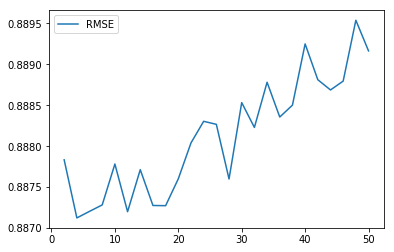

In [7]:
def trim_high_variance(test_data):
    movie_map = dict()
    for (user, movie, rate) in test_data:
        if (movie in movie_map):
            movie_map[movie].append(rate)
        else: 
            movie_map[movie] = [rate]
    for movie in movie_map:
        if len(movie_map[movie])<5 or np.var(np.array(movie_map[movie]))<2:
            test_data = filter(lambda x: x[1] != movie, test_data)
    return test_data

rmse_list_high_variance = knn_filter_trim(trim_high_variance)
plot_rmse(rmse_list_high_variance)  

Qustion 29
---

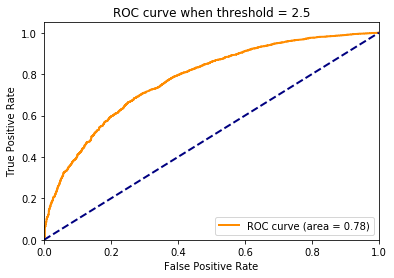

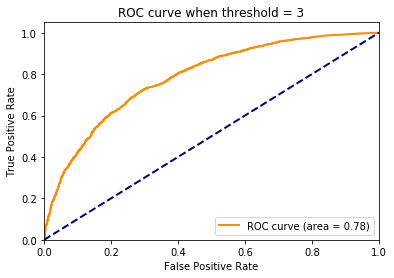

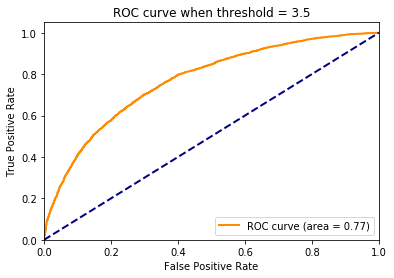

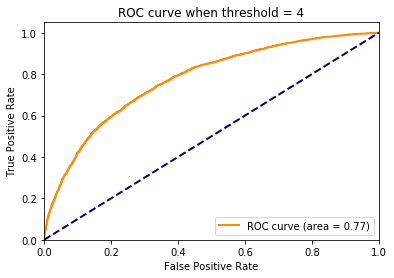

In [8]:
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from surprise.prediction_algorithms.matrix_factorization import SVD
import os
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt

thresholds = [2.5, 3, 3.5, 4]
k = 18

trainset, testset = train_test_split(data, test_size = 0.1)
algo = SVD(k)
algo.fit(trainset)
predictions = algo.test(testset)

label_true = [x[2] for x in predictions]
label_esti = [x[3] for x in predictions]

for threshold in thresholds:
    binary_true = map(lambda x : 0 if x < threshold else 1, label_true)
    binary_true = np.fromiter(binary_true, dtype=np.int)
    fpr, tpr, _ = roc_curve(binary_true, label_esti)
    roc_auc = auc(fpr,tpr)
    
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve when threshold = ' + str(threshold))
    plt.legend(loc="lower right")
    plt.show()